<a href="https://colab.research.google.com/github/shalita-wahyudhie/hacker_statistics/blob/main/Case_Study_with_Hacker_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Going Upstair
You are going up the stairs of you office building with your friend and you decided to play a game. The game is you both will roll a dice 100 time. If the dice is 1 or 2, you go one step down. If it is 3, 4, or 5, you go one step up. If the dice is 6, you get to roll the dice once again and step up as many step as the number of dice you get. You then bet that you will reach 60 steps high. What is the chance that you will win this bet?

###First step 

The first step solve this is to model our random steps and walks with tha random package in numpy.

In [22]:
# Import numpy as np
import numpy as np

First we make a loop that will run 100 times, that is the 100 times we will roll the dice. We will roll the dice and make a random_walk list that contains the first step, which is the integer 0. On each iteration or dice throw, our step will be calculated from the last position in this random_walk list. We should also note that we cannot go below the 0th step.

In [23]:
# Set random seed so results are reproducible between simulations
np.random.seed(123)

# Initialize random_walk
random_walk = [0]

# Looping for 100 dice throws
for x in range(100) :
    # Step is calculated from the last position in random walk
    step = random_walk[-1] 
    # Rolling the dice
    dice = np.random.randint(1,7)

    if dice <= 2:
        # If dice is 1 or 2, go down one step
        # Use max to make sure step can't go below 0
        step = max(0,step - 1)
    elif dice <= 5:
        # If dice is 3, 4, 5, go up one step
        step = step + 1
    else:
        # If the dice is 6, throw dice again
        step = step + np.random.randint(1,7)

    # Append the last position to random_walk list
    random_walk.append(step)

print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


Now let's visualize our walk with matplotlib.pyplot.

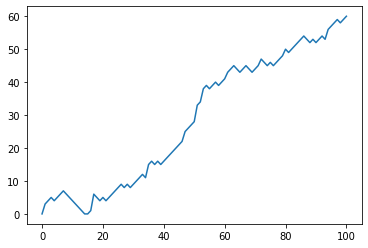

In [24]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

To actually get an idea about how big our chances are of reaching the 60th step, we will repeatedly simulate the random walks and collect the results.

Lets simulate 10 random walks and add the to a list called all_walks.

In [25]:
# Initialize all_walks for all possible walk scenarios
all_walks = []

# Simulating 10 random walks
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

[[0, 4, 3, 2, 4, 3, 4, 6, 7, 8, 13, 12, 13, 14, 15, 16, 17, 16, 21, 22, 23, 24, 23, 22, 21, 20, 19, 20, 21, 22, 28, 27, 26, 25, 26, 27, 28, 27, 28, 29, 28, 33, 34, 33, 32, 31, 30, 31, 30, 29, 31, 32, 35, 36, 38, 39, 40, 41, 40, 39, 40, 41, 42, 43, 42, 43, 44, 45, 48, 49, 50, 49, 50, 49, 50, 51, 52, 56, 55, 54, 55, 56, 57, 56, 57, 56, 57, 59, 64, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 71, 73], [0, 2, 1, 2, 3, 6, 5, 6, 5, 6, 7, 8, 7, 8, 7, 8, 9, 11, 10, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 24, 25, 24, 23, 22, 21, 22, 23, 24, 29, 30, 29, 30, 31, 32, 33, 34, 35, 34, 33, 34, 33, 39, 38, 39, 38, 39, 38, 39, 43, 47, 49, 51, 50, 51, 53, 52, 58, 59, 61, 62, 61, 62, 63, 64, 63, 64, 65, 66, 68, 67, 66, 67, 73, 78, 77, 76, 80, 81, 82, 83, 85, 84, 85, 84, 85, 84, 83], [0, 6, 5, 6, 7, 8, 9, 10, 11, 12, 13, 12, 13, 12, 11, 12, 11, 12, 11, 12, 13, 17, 18, 17, 23, 22, 21, 22, 21, 20, 21, 20, 24, 23, 24, 23, 24, 23, 24, 26, 25, 24, 23, 24, 23, 28, 29, 30, 29, 28, 29, 28, 29, 28, 33, 3

all_walks is a list of lists where every sub-list represents a single random walk. We can convert all-walks to NumPy array to plot it.

In [26]:
# Convert all_walks to NumPy array: np_aw
np_aw=np.array(all_walks)

But first we transpose np_aw so that every row represents the position after 1 throw for the 10 random walks. This will make the plot easier to read.

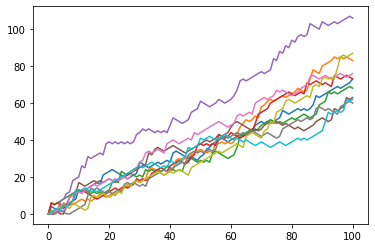

In [27]:
# Transpose np_aw: np_aw_t
np_aw_t=np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

Now what if we calculate another factor that is clumsiness. Say we are a bit clumsy and have a 0.1% chance of falling down. This calls for another random number generation. Basically, we will generate a random float between 0 and 1. If this generate a value less than or equal to 0.001, we should reset step to 0.

This time we will simulate 250 random walks.

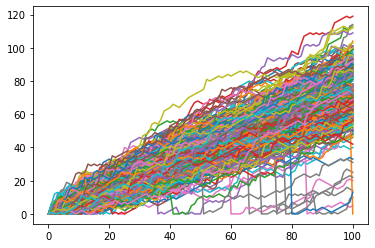

In [28]:
# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement new condition: clumsiness
        if np.random.rand()<=0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

Now the final question: What are the odds that we'll reach 60 steps high on this quest?

Basically, we want to know about the end points of all random walks we have simulated. These end points will have a certain distribution that we can visualize with a histogram.

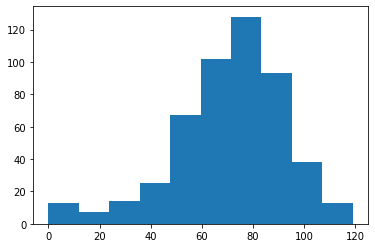

In [29]:
# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select only the last position (last row from np_aw_t): ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

This histogram is created from a NumPy array ends, containing 500 integers. Each integer represents the end point of a simulated random walk. To calculate the chance that this end point is greater than or equal to 60, we can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.


In [30]:
np.mean(ends>=60)

0.748

And then that's it. It seems like we have a pretty high chance of winning this bet. 